# Visualize simulation data over sensors by seasons
- This script is used to visualize hourly mean simulation data by seasons.
- Simulations: CNTL_PT, LCZ_PT.

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
home_path = '/gws/nopw/j04/duicv/yuansun/'
output_dir = home_path + '0_lcz_mcr/output_analysis/single_point/variation_diurnal_season/'
season_list = ['DJF', 'MAM', 'JJA', 'SON']
tem_list = ['temp_hourly_avg_corrected', 'TSA_def', 'TSA_lcz']
rh_list = ['rh_hourly_avg_corrected', 'RH2M_def', 'RH2M_lcz']
label_list = ['OBS','CNTL', 'LCZ']
var_list = [tem_list, rh_list]

In [3]:
title_list = ['(a) ', '(b) ', '(c) ', '(d) ', '(e) ', '(f) ', '(g) ', '(h) ']
variable_list = ['$T_{air} $', '$RH$']
lc0 = '#e41a1c'
lc1 = '#377eb8'
lc2 = '#4daf4a'
lc_list = [lc0, lc1, lc2]
linewidth = 0.5
labelcolor = '#6b6b6b'
padding = 3
marker = 'o'
labelfont = 6
pad = 1
xwidth = 0.5
length = 2
marker_size = 1
marker_linewidth = 0.2
handletextpad = 0.5
unit_list = ['°C', '%']
ylim_list = [[2.5, 25], [50, 100]]
x_loc = -0.15
x_offset = 0.4

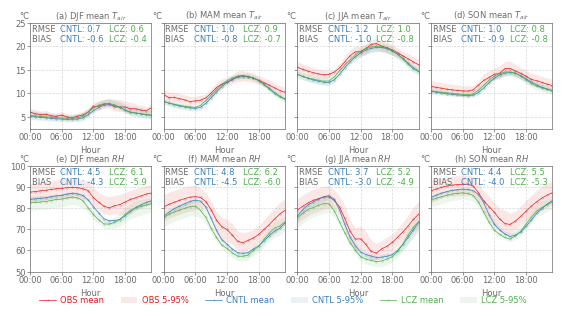

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(5.5, 3))
ax = axes.flatten()
for i in range(2):
    var = var_list[i]
    for j in range(4):
        season_df = pd.read_csv(output_dir + season_list[j] + '_hourly_mean.csv').set_index('timestamp')
        data_var = season_df[var].groupby('timestamp').mean()
        data5_var = season_df[var].groupby('timestamp').quantile(0.05)
        data95_var = season_df[var].groupby('timestamp').quantile(0.95)
        ax[i * 4 + j].text(0.015, 0.9, 'RMSE ', fontsize=labelfont, color=labelcolor, horizontalalignment='left', verticalalignment='bottom', transform=ax[i * 4 + j].transAxes)
        ax[i * 4 + j].text(0.015, 0.8, 'BIAS ', fontsize=labelfont, color=labelcolor, horizontalalignment='left', verticalalignment='bottom', transform=ax[i * 4 + j].transAxes)
        for m, sim in enumerate(var):
            data_var_sim = data_var[var[m]]
            data_5_var_sim = data5_var[var[m]]
            data_95_var_sim = data95_var[var[m]] 
            ax[i * 4 + j].plot(range(len(data_var_sim)), data_var_sim, label = label_list[m] + ' mean', linewidth = linewidth, 
                               color = lc_list[m], marker = marker, markersize = marker_size, markerfacecolor = 'none', markeredgewidth = marker_linewidth)
            ax[i * 4 + j].fill_between(range(len(data_var_sim)), data_5_var_sim, data_95_var_sim, label = label_list[m] + ' 5-95%', color = lc_list[m], alpha = 0.1, linewidth = 0)
            if m > 0:
                rmse = np.sqrt(np.mean((data_var_sim - data_var[var[0]])**2))
                ax[i * 4 + j].text(x_loc + x_offset * m, 0.9, label_list[m] + ': {:.1f}'.format(rmse), fontsize=labelfont, color=lc_list[m], horizontalalignment='left', verticalalignment='bottom', transform=ax[i * 4 + j].transAxes) 
                bis = np.mean(data_var_sim - data_var[var[0]])
                ax[i * 4 + j].text(x_loc + x_offset * m, 0.8, label_list[m] + ': {:.1f}'.format(bis), fontsize=labelfont, color=lc_list[m], horizontalalignment='left', verticalalignment='bottom', transform=ax[i * 4 + j].transAxes)
        ax[i * 4 + j].set_title(title_list[i * 4 + j] + season_list[(i * 4 + j)%4] + ' mean ' + variable_list[i + (j//4)], fontsize = labelfont, color = labelcolor, pad = padding)   
        ax[i * 4 + j].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)    
        ax[i * 4 + j].set_xlabel('Hour', fontsize = labelfont, color = labelcolor, labelpad = padding)
        if (i * 4 + j == 0) or (i * 4 + j == 4):
             ax[i * 4 + j].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelcolor=labelcolor, color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
        else:
             ax[i * 4 + j].tick_params(axis='y', which='both', left=True, right=False, labelleft=False, labelcolor=labelcolor, color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)     
        ax[i * 4 + j].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
        ax[i * 4 + j].spines['top'].set_color(labelcolor)
        ax[i * 4 + j].spines['right'].set_color(labelcolor)
        ax[i * 4 + j].spines['bottom'].set_color(labelcolor)
        ax[i * 4 + j].spines['left'].set_color(labelcolor)
        ax[i * 4 + j].spines['top'].set_linewidth(xwidth)
        ax[i * 4 + j].spines['right'].set_linewidth(xwidth)
        ax[i * 4 + j].spines['bottom'].set_linewidth(xwidth)
        ax[i * 4 + j].spines['left'].set_linewidth(xwidth)
        ax[i * 4 + j].set_ylabel(unit_list[i//4], labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
        ax[i * 4 + j].yaxis.set_label_coords(-0.05, 1.025)
        ax[i * 4 + j].set_ylim(ylim_list[i])
        ax[i * 4 + j].set_xlim([0, 23])   
        ax[i * 4 + j].set_xticks([0, 6, 12, 18])
        ax[i * 4 + j].set_xticklabels(['00:00', '06:00', '12:00', '18:00']) 

plt.subplots_adjust(left=0.04, right=0.99, bottom=0.12, top=0.95, wspace=0.1, hspace= 0.35)
lines, labels = ax[0].get_legend_handles_labels()
legend = fig.legend(lines, labels, bbox_to_anchor=(0.5, -0.015), loc='lower center', frameon=False, 
                        handletextpad=handletextpad, fontsize=labelfont, ncol=6)
llc = [lc0, lc0, lc1, lc1, lc2, lc2]
for t, text in enumerate(legend.get_texts()):
    text.set_color(llc[t])
fig.savefig(output_dir + 'temporal_variation_seanson.png', dpi=300)    
fig.savefig(output_dir + 'temporal_variation_seanson.pdf', dpi=600) 

# Result description

In [9]:
# JJA
jja_df = pd.read_csv(output_dir + season_list[2] + '_hourly_mean.csv')

In [12]:
print(round((jja_df['TSA_lcz'] - jja_df['temp_hourly_avg_corrected']).mean(),1), round((jja_df['TSA_def'] - jja_df['temp_hourly_avg_corrected']).mean(),1))

-0.8 -1.0


In [10]:
jja_df_15  = jja_df[jja_df['timestamp']==15]
jja_df_15

,timestamp,rh_hourly_avg_corrected,temp_hourly_avg_corrected,TSA_def,RH2M_def,TSA_lcz,RH2M_lcz,sensor
15,15,60.872144,20.430042,20.369304,56.999760,20.488095,55.194831,MOD-PM-00097
39,15,63.143728,20.641859,19.518413,57.711252,19.745527,56.487178,MOD-PM-00342
63,15,56.924426,21.305782,19.544498,57.721059,19.867570,55.347522,MOD-PM-00343
87,15,55.779724,21.789726,20.429464,57.000704,20.444370,55.809089,MOD-PM-00348
111,15,61.634565,19.759552,19.283629,56.860827,19.285283,55.719114,MOD-PM-00349
135,15,62.041617,19.971527,19.345379,56.872095,19.344838,55.629618,MOD-00036
159,15,56.197342,20.945640,19.810927,56.167801,20.140369,53.655500,MOD-00038
183,15,55.320331,21.567946,19.961113,56.182924,21.041051,51.927837,MOD-00039
207,15,59.523149,20.438659,19.292764,56.843582,19.468330,54.975600,MOD-00043
231,15,60.842302,20.282345,19.828397,56.796944,20.076910,54.946300,MOD-PM-00426


In [15]:
jja_df_15_mean = jja_df_15[['rh_hourly_avg_corrected', 'temp_hourly_avg_corrected',	'TSA_def',	'RH2M_def',	'TSA_lcz',	'RH2M_lcz']].mean()
jja_df_15_mean

rh_hourly_avg_corrected      58.753212
temp_hourly_avg_corrected    20.555883
TSA_def                      19.733163
RH2M_def                     56.696452
TSA_lcz                      19.999586
RH2M_lcz                     54.735654
dtype: float64

In [13]:
jja_df_15_5 = jja_df_15[['rh_hourly_avg_corrected', 'temp_hourly_avg_corrected',	'TSA_def',	'RH2M_def',	'TSA_lcz',	'RH2M_lcz']].quantile(0.05)
jja_df_15_5

rh_hourly_avg_corrected      55.308693
temp_hourly_avg_corrected    19.378414
TSA_def                      18.799396
RH2M_def                     55.778300
TSA_lcz                      18.862299
RH2M_lcz                     52.405854
Name: 0.05, dtype: float64

In [14]:
jja_df_15_95 = jja_df_15[['rh_hourly_avg_corrected', 'temp_hourly_avg_corrected',	'TSA_def',	'RH2M_def',	'TSA_lcz',	'RH2M_lcz']].quantile(0.95)
jja_df_15_95

rh_hourly_avg_corrected      63.243948
temp_hourly_avg_corrected    21.677598
TSA_def                      20.447187
RH2M_def                     57.722638
TSA_lcz                      20.942290
RH2M_lcz                     56.526484
Name: 0.95, dtype: float64

In [16]:
print(round((jja_df_15['RH2M_def']- jja_df_15['rh_hourly_avg_corrected']).mean(), 1), round((jja_df_15['RH2M_lcz']- jja_df_15['rh_hourly_avg_corrected']).mean(), 1))

-2.1 -4.0


In [17]:
print(round((jja_df_15['TSA_def']- jja_df_15['temp_hourly_avg_corrected']).mean(), 1), round((jja_df_15['TSA_lcz']- jja_df_15['temp_hourly_avg_corrected']).mean(), 1))

-0.8 -0.6
